In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
dfs = []
parent_file_location = os.path.dirname(os.path.abspath(os.getcwd()))
latnecy_data_path = os.path.join(parent_file_location,'results','latency')
for root, dir,files in os.walk(latnecy_data_path):
    for file in files:
        if file == 'raw_data.csv':
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            dfs.append(df)
raw_df = pd.concat(dfs, ignore_index=True)
raw_df.head()


,return_code,payload,latency,vaidator_count
0,200,{'client_req_id': 'c346e0d8-3f5b-4ce5-aa9e-e8e...,1.122277,1
1,200,{'client_req_id': 'c346e0d8-3f5b-4ce5-aa9e-e8e...,0.926205,1
2,200,{'client_req_id': 'c346e0d8-3f5b-4ce5-aa9e-e8e...,0.716447,1
3,200,{'client_req_id': 'c346e0d8-3f5b-4ce5-aa9e-e8e...,0.769212,1
4,200,{'client_req_id': 'c346e0d8-3f5b-4ce5-aa9e-e8e...,0.709591,1


In [75]:
sucess_results = raw_df[raw_df['return_code'] == 200]
sucess_results.head()


,return_code,payload,latency,vaidator_count
0,200,{'client_req_id': 'c346e0d8-3f5b-4ce5-aa9e-e8e...,1.122277,1
1,200,{'client_req_id': 'c346e0d8-3f5b-4ce5-aa9e-e8e...,0.926205,1
2,200,{'client_req_id': 'c346e0d8-3f5b-4ce5-aa9e-e8e...,0.716447,1
3,200,{'client_req_id': 'c346e0d8-3f5b-4ce5-aa9e-e8e...,0.769212,1
4,200,{'client_req_id': 'c346e0d8-3f5b-4ce5-aa9e-e8e...,0.709591,1


In [76]:
grouped_resultes = sucess_results.groupby('vaidator_count')
result = grouped_resultes['latency'].agg(
    sample_count=('count'),
    mean_value=('mean'),
    percentile_75=lambda x: x.quantile(0.75),
    percentile_95=lambda x: x.quantile(0.95)
).reset_index()

result.head()

,vaidator_count,sample_count,mean_value,percentile_75,percentile_95
0,1,10,0.832457,0.888493,1.034045
1,5,9,1.939065,1.983874,2.254989
2,10,9,3.436528,3.812382,3.901375


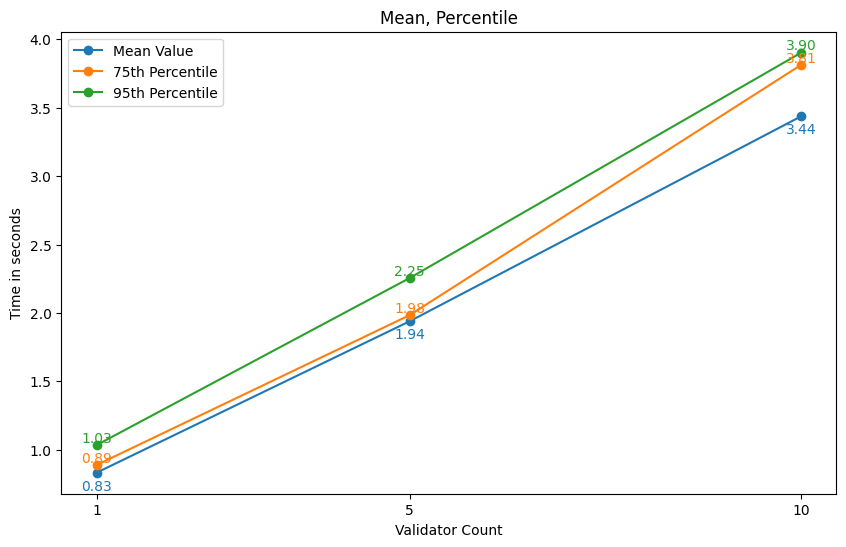

In [77]:
plt.figure(figsize=(10, 6))
mean_line, = plt.plot(result['vaidator_count'], result['mean_value'], label='Mean Value', marker='o')
p75_line, = plt.plot(result['vaidator_count'], result['percentile_75'], label='75th Percentile', marker='o')
p95_line, = plt.plot(result['vaidator_count'], result['percentile_95'], label='95th Percentile', marker='o')

plt.title('Mean, Percentile')
plt.xlabel('Validator Count')
plt.ylabel('Time in seconds')
plt.legend()
plt.xticks(result['vaidator_count'])

for i in range(len(result)):
    # Annotating mean values
    plt.text(result['vaidator_count'][i], result['mean_value'][i] -0.15, f'{result["mean_value"][i]:.2f}', ha='center', va='bottom',  color=mean_line.get_color())    
    # Annotating 25th, 50th (median), and 75th percentiles
    plt.text(result['vaidator_count'][i], result['percentile_75'][i], f'{result["percentile_75"][i]:.2f}', ha='center', va='bottom',  color=p75_line.get_color())
    plt.text(result['vaidator_count'][i], result['percentile_95'][i], f'{result["percentile_95"][i]:.2f}', ha='center', va='bottom',  color=p95_line.get_color())



plt.show()

In [82]:
error_results = raw_df[raw_df['return_code'] != 200]
error_results.reset_index()
error_results.head()

grouped_results_error = error_results.groupby('vaidator_count')
grouped_results_error.head()

error_result = grouped_results_error['latency'].agg(
    error_count=('count'),
).reset_index()

merged_df = pd.merge(result,error_result, on='vaidator_count', how='outer')
merged_df.fillna(0, inplace=True)
merged_df['error_percentage'] = merged_df['error_count']/(merged_df['error_count'] + merged_df['sample_count'])*100
merged_df.head()

,vaidator_count,sample_count,mean_value,percentile_75,percentile_95,error_count,error_percentage
0,1,10,0.832457,0.888493,1.034045,0.0,0.0
1,5,9,1.939065,1.983874,2.254989,1.0,10.0
2,10,9,3.436528,3.812382,3.901375,1.0,10.0


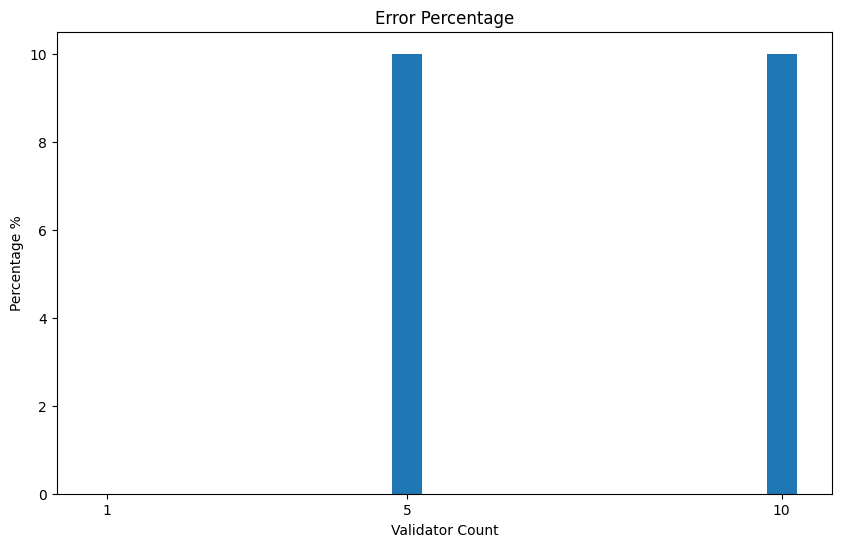

In [95]:
plt.figure(figsize=(10, 6))

plt.bar(merged_df['vaidator_count'], merged_df['error_percentage'],  width=0.9)

plt.title('Error Percentage')

plt.xlabel('Validator Count')
plt.ylabel('Percentage %')
plt.xticks(result['vaidator_count'])


plt.show()